# Pymaceuticals Inc.
---

### Analysis

From the calculations, the most distinct conclusions I could find from the dataset are as follows:

1. Mice that weighed more were more likely to have larger tumors than smaller mice. 
We can see in the line graph, that tumor volume is directly proportionate to weight. Our Pearson Correlation Coefficient (R-Value) was calculated to be 0.84, which means the results are strongly positively correlated.
2. Out of the four selected drugs(Capomulin, Ramicane, Ceftamin, and Infubinol), Ramicane and Capomulin treatments have less variance in the tumor volumes at the greatest timepoint than drugs Ceftamin and Infubinol. 
We know this because the values are closer to the means on the boxplot, and the quartile ranges are much smaller. We can infer that Ramicane and Capomulin are more effective than Ceftamin and Infubinol.
3. Lastly, from the same Tumor Volumes boxplot, we can see that the mean tumor volume for Infubinol and Ceftamin are much higher than the mean tumor volumes for Ramicane and Capomulin.
Because of this, we can reaffirm the inference that these two drugs are less affective than Ramicane and Capomulin. 
4. The drugs Capomulin and Ramicane may have a closely related structure because of how similar their results were. This is the same for Ceftamin and Infubinol.
Although the drug pairs are much different from each other, within the pairs, the means and variances are very similar and have similar results! 

In [ ]:
# Checking the number of mice.

mouse_id = merged_df['Mouse ID'].unique()
num_mouse_id = len(mouse_id)
num_mouse_id

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')

#Formatting 
dataset_df = merged_df.loc[:,['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
                      'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]#.sort_values(by="Mouse ID", ascending=True)

# Display the data table for preview
dataset_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = dataset_df[dataset_df.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dataset_clean = dataset_df[dataset_df['Mouse ID']!='g989']
dataset_clean

# note: dataset_clean dropped 13 rows and now has 1880

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [5]:
# Checking the number of mice in the clean DataFrame.

num_mouse_clean = len(dataset_clean["Mouse ID"].unique())
num_mouse_clean

248

## Summary Statistics

In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor = dataset_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median_tumor = dataset_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
var_tumor = dataset_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
sd_tumor = dataset_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem_tumor = dataset_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


 
# Assemble the resulting series into a single summary DataFrame.
tumor_original_stats = pd.DataFrame({'Mean Tumor Volume': mean_tumor,
                                    'Median Timor Volume': median_tumor,
                                   'Tumor Volume Variance': var_tumor,
                                     'Tumor Volume Std. Dev.': sd_tumor,
                                     'Tumor Volume Std. Err.': sem_tumor,
})
tumor_original_stats

,Mean Tumor Volume,Median Timor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = dataset_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median', 'var', 'std', 'sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

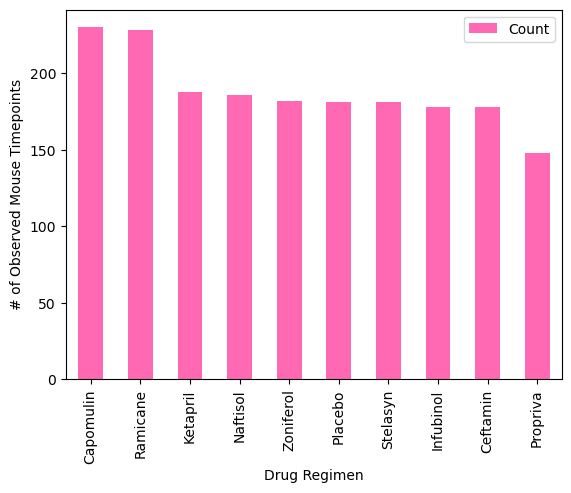

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_count = pd.DataFrame({'Drug Regimen': dataset_clean['Drug Regimen'].unique(),
                           'Count': dataset_clean["Drug Regimen"].value_counts()
})

# Pandas Plot
drug_count.plot(kind='bar', color = 'hotpink')

# Formatting
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()


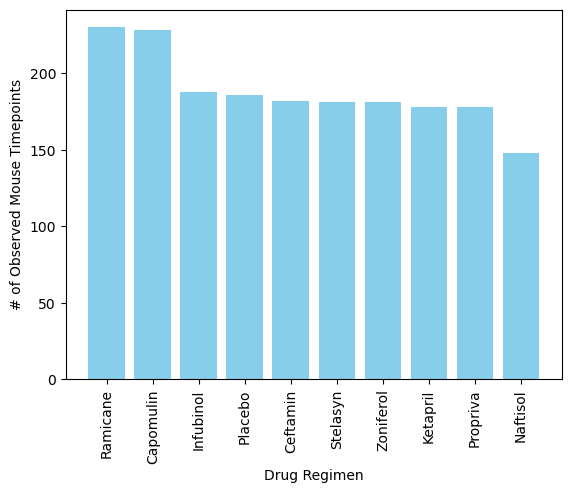

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

# Pyplot plot
plt.bar(x_axis, drug_count['Count'], color="skyblue", align = "center", width = 0.8)

# Formatting
plt.xticks(tick_locations, drug_count['Drug Regimen'], rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

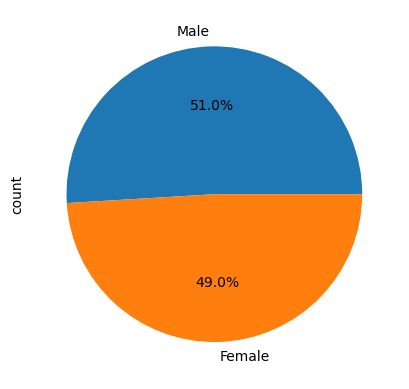

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_mice = dataset_clean.Sex.value_counts()

# Pandas Plot
sex_mice.plot(kind='pie',autopct="%.1f%%")
plt.show()


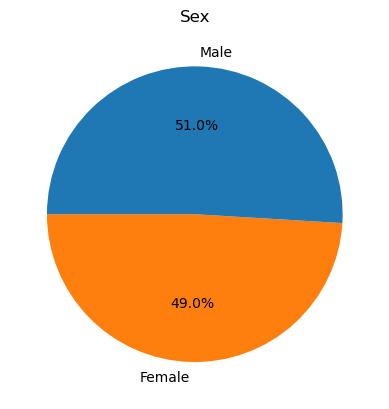

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [sex_mice['Female'], sex_mice['Male']]
labels = ['Female','Male']

# Pyplot plot
plt.pie(sizes, labels = labels, colors = ['tab:orange','tab:blue'], autopct = "%.1f%%", startangle = 180)
plt.title('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across these treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = dataset_clean.groupby('Mouse ID')["Timepoint"].max().reset_index()

# Retrieve the maximum timepoint for each mouse, and put it in a dataframe
grouped_df = pd.merge(dataset_clean, greatest_timepoint, on = ['Mouse ID','Timepoint'], how = 'right')
grouped_df

selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_drugs_df = grouped_df.loc[grouped_df['Drug Regimen'].isin(selected_drugs)]
selected_drugs_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = selected_drugs_df['Drug Regimen'].unique()
 
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for treatment in treatments:
    subset = selected_drugs_df.loc[selected_drugs_df['Drug Regimen'] == treatment]
    volume = subset['Tumor Volume (mm3)']
    tumor_volume_data.append(volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    outlier = volume.loc[(volume > upper_bound) | (volume < lower_bound)]
    print(f"{treatment}'s potential outliers: {outlier}")
    

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


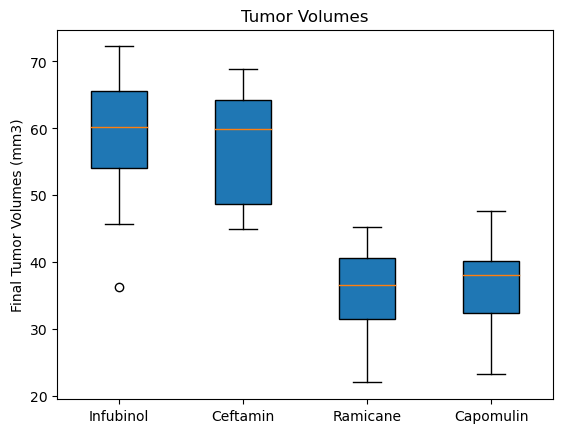

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data = selected_drugs_df.loc[selected_drugs_df['Drug Regimen'] == treatment]
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_data, labels = treatments, patch_artist = True)
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Final Tumor Volumes (mm3)')
plt.show()

## Line and Scatter Plots

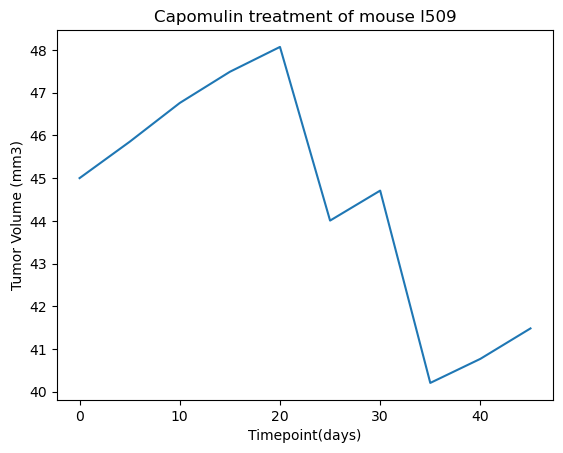

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Get the information for a single mouse
single_mouse_df = dataset_clean.loc[dataset_clean['Mouse ID']=='l509']

# Establish x and y, print, and format
x_axis = single_mouse_df['Timepoint']
points = single_mouse_df['Tumor Volume (mm3)']
plt.plot(x_axis, points)

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

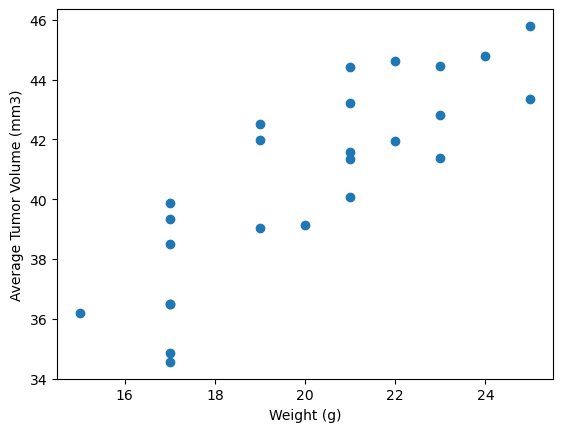

In [16]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Find values to be manipulated and save them to new variables
capomulin = dataset_clean.loc[dataset_clean['Drug Regimen'] =='Capomulin']
avg_capo_clean_by_mice = capomulin.groupby('Mouse ID')[["Tumor Volume (mm3)",'Weight (g)']].agg('mean')

# Establish x and y values
x = avg_capo_clean_by_mice['Weight (g)']
y = avg_capo_clean_by_mice['Tumor Volume (mm3)']

# Calculate the regression values
(slope, intercept, rvalue, pvalue, stderr)=linregress(x, y)
regress_values = x * slope + intercept

# Print scatter plot and format
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

 The correlation between mouse weight and the average tumor volume is 0.84
y = 0.95x + 21.55


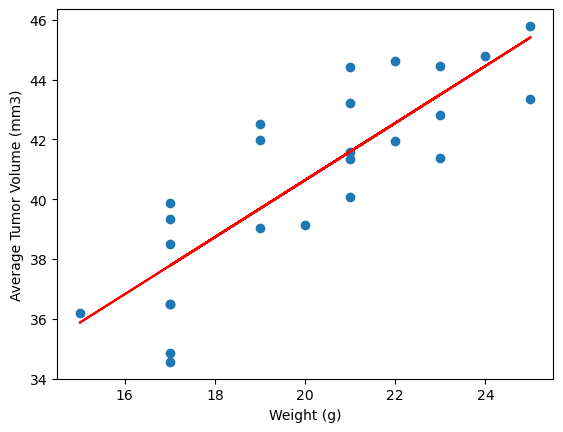

In [17]:
# Linear regression

# Plot the linear regression, calculate the correlation coefficient, and the equation for the trendline.
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Format and print
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f" The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
print(line_eq)
plt.show()